<a href="https://colab.research.google.com/github/butler-julie/DataScienceForPhysicists2025/blob/main/02_IntroductionToMachineLearning/IntroductionToMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

**Author**: Julie Butler (University of Mount Union)

**Date Created**: March 14, 2025

**Last Modified**: March 15, 2025

Created for the Data Science for Physicists Short Course at the 2025 APS Global Physics Summit


## Imports

In [1]:
#############
## IMPORTS ##
############
# Pandas to import and format the data set
import pandas as pd
# Matplotlib for graphing
import matplotlib.pyplot as plt
# Numpy for arrays and mathematical operations
import numpy as np
# Seaborn for pairplot
import seaborn as sns

# Ridge regression implementation
from sklearn.linear_model import Ridge
# Mean-squared error implementation
from sklearn.metrics import mean_squared_error
#Random train-test split
from sklearn.model_selection import train_test_split
# Standard scaler for normalizing the features
from sklearn.preprocessing import StandardScaler
# Grid search and randomized search are two hyperparameter tuning
# algorithms
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# Support vector machines for regression (svr) are another regression
# machine learning algorithm
from sklearn.svm import SVR 
# k-nearest neighbors is a classification algorithm
from sklearn.neighbors import KNeighborsClassifier
# Accuracy score and confusion matrix to evaluate the performance of a
# classification problem
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
# Import and format the data, see the notebook in 1: Data Exploration and Visualization
# for an explanation of the steps.
nuclear_data = pd.read_csv("https://raw.githubusercontent.com/butler-julie/DataExplorationAndVisualization/main/nuclear_data.tsv",sep="\t")

nuclear_data['BE'] = pd.to_numeric(nuclear_data['BE'], errors='coerce')
nuclear_data['BEd'] = pd.to_numeric(nuclear_data['BEd'], errors='coerce')
nuclear_data['MASS'] = pd.to_numeric(nuclear_data['MASS'], errors='coerce')
nuclear_data['MASSd'] = pd.to_numeric(nuclear_data['MASSd'], errors='coerce')

nuclear_data = nuclear_data.dropna()

nuclear_data["BE"] /= 1e3
nuclear_data["BEd"] /= 1e3

nuclear_data["MASS"] *= 1e-6
nuclear_data["MASSd"] *= 1e-6

## Scikit-Learn: Creating Basic Machine Learning 

[Scikit-Learn](https://scikit-learn.org/stable/) is a Python library that implements many [machine learning models](https://en.wikipedia.org/wiki/Machine_learning) (including [neural networks](https://en.wikipedia.org/wiki/Neural_network_(machine_learning))) in [easy to use ways](https://scikit-learn.org/stable/tutorial/basic/tutorial.html). In this section, we will use a type of machine learning known as [ridge regression](https://en.wikipedia.org/wiki/Ridge_regression) to attempt to fit the binding energies to the [liquid drop model](https://en.wikipedia.org/wiki/Semi-empirical_mass_formula). The liquid drop model is a semi-empirical formula for calculating the binding energies of the various nuclei using only N and Z (remember that A = N + Z). A semi-empirical formula is a formula whose form is partially based on theory but with coefficients that fit using experimental data. For example, the liquid drop model can be defined as:

$$BE_{liquid\ drop}(N,Z) = a_vA - a_sA^{2/3} - a_c \frac{Z(Z-1)}{A^{1/3}} - a_A\frac{(N-Z)^2}{A} + \delta (N,Z),$$

where the coefficients $a_v$, $a_s$, $a_c$, $a_A$ and the function $\delta(N,Z)$ are determined using experimental data. Numerical values for these and an explanation for each term in the equation can be found [here](https://en.wikipedia.org/wiki/Semi-empirical_mass_formula#The_liquid-drop_model).

Unlike [Seaborn](https://seaborn.pydata.org), which can handle a [Pandas Dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), or [Matplotlib](https://matplotlib.org), which can handle [Pandas Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html), for Scikit-Learn we need the data to be formatted as an Numpy array. We can do this as follows, using the [`array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) function from the Numpy library.

In [3]:
A = np.array(nuclear_data["A"])
Z = np.array(nuclear_data["Z"])
N = np.array(nuclear_data["N"])
BE = np.array(nuclear_data["BE"])

Next, let's create arrays that match the form of each term in the liquid drop model (except for the last term). When creating these terms, we will leave off the coefficients, as we want to be able to find these with the machine learning algorithm. This will create the inputs to our machine learning algorithm.

In [4]:
term1 = A
term2 = -A**(2/3)
term3 = -Z*(Z-1)/A**(1/3)
term4 = -(N-Z)**2/A

X = np.array([term1, term2, term3, term4]).T

In machine learning it is common to split your entire data set in two pieces. The first piece, which is larger (about 75%-80% of the data), is called the training set. This part of the data set is used to train the machine learning model. The other part of the data set (about 20%-25%) is used to test the performance of the trained machine learning model. Scikit-Learn has a function called [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which allow you to easily split your data set into training and test data sets. 

In the below code cell we use out liquid drop model inspired X data set as the inputs and the binding energies as the outputs. Note that the liquid drop model is used to fit binding energies but our data set is given in binding energy per nucleon, so we must multiply BE and A together to get the data that the liquid drop model is expecting.

In [5]:
X_train, X_test, BE_train, BE_test = train_test_split(X,BE*A,test_size=0.2)

Now we can perform the machine learning using ridge regression. The first line of the below code cell defines a ridge regression algorithm using the Scikit-Learn library's [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html). The second line fits the ridge regression algorithm using the `fit` function and our training data. The third line uses the inputs of the test data set to generate a set of predictions from the trained machine learning model using the `predict` function.

In [6]:
ridge_regression = Ridge()
ridge_regression.fit(X_train,BE_train)
BE_pred = ridge_regression.predict(X_test)

Now let's use Sci-kit Learn's build in [mean squared error function](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE) to determine the accuracy of our machine learning model.

In [7]:
print("MSE:", mean_squared_error(BE_test, BE_pred), "MeV^2")

MSE: 13.16142625783282 MeV^2


Using the root mean-squared error metric (the square root of the mean-squared error score, RMSE) is also useful as its units will be MeV, allowing us to directly compare the error to our binding energies. Even though our RMSE score is greater than 1 MeV, it is still quite small compared to the average binding energy (not per nucleon) in the data set.

In [8]:
print("RMSE:", np.sqrt(mean_squared_error(BE_test, BE_pred)), "MeV")
print("Average Binding Energy:", np.average(BE*A), "MeV")

RMSE: 3.6278680044666483 MeV
Average Binding Energy: 1060.998638536429 MeV


We can also compare our machine learning model to the true (experimental) data set graphically. First, we will use the trained machine learning model to predict the binding energy at every possible input and then convert those predictions to binding energies per nucleon. We will then plot these predicted binding energies per nucleon on the same plot as the experimental (or true) binding energies per nucleon and use a legend to tell the data sets apart. 

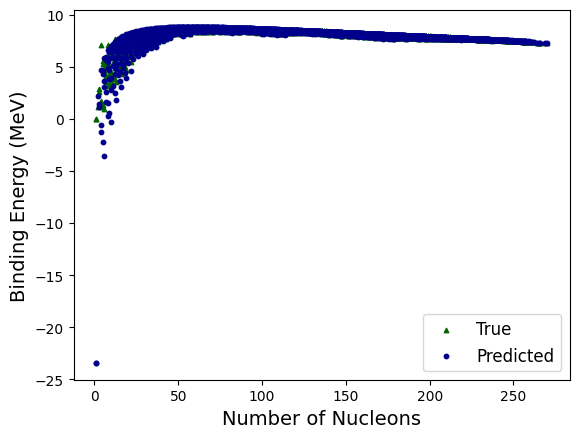

In [9]:
BE_pred = ridge_regression.predict(X)
BE_pred /= A

plt.scatter(A,BE,s=10,marker='^',color="darkgreen",label="True")
plt.scatter(A,BE_pred,s=10,marker='o',color="darkblue",label="Predicted")

plt.xlabel("Number of Nucleons", fontsize=14)
plt.ylabel("Binding Energy (MeV)", fontsize=14)

plt.legend(fontsize=12, loc='lower right')

Finally, because we created an input data set based on the liquid drop model, we can compare the coefficients predicted by the liquid drop model to the known coefficients of the model. We can extract the trained coefficients from our ridge regression model using `coef_`.

In [10]:
aV = 15.76
aS = 17.81
aC = 0.711
aA = 23.702

print("The known coefficients are:", aV, ",", aS,",", aC, ",", aA)
print("The predicted coeffients are:", ridge_regression.coef_)

The known coefficients are: 15.76 , 17.81 , 0.711 , 23.702
The predicted coeffients are: [15.19605072 16.14325605  0.68103567 22.01064192]


## Improving the Machine Learning Model

Often the initial attempt at the machine learning model will not yield sufficient results. Thus we will attempt to improve the performance of the machine learning model through a variety of methods.

### Hyperparameter Tuning
All machine learning methods work by fitting a set of internal parameters such that their outputs are as close to the known outputs as possible for the given inputs. However, many machine learning algorithms have user-set parameters, called [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning)). Varying the value of these hyperparameters can drastically change the output of the algorithm. Thus, one of the simplest ways to improve the performance of a machine learning algorithm is through hyperparameter tuning, through trying various different combinations of valid values for the hyperparameters.

Ridge regression has one major hyperparameter, usually represented by [$\alpha$ as in the scikit-learn notation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), or by $\lambda$. The parameter, known as the strength of the regularization, changes the wait of the second term in the objective function (see the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)). Changing the objective function will change the optimized values of the parameters of the trained ridge regression algorithm, and thus will change the output of the algorithm. The below code uses a basic for loop to iterate through 50 different values of `alpha` (which can be any number) and determines which value of `alpha` results in the lowest mean-squared error. There are more sophisticated methods of hyperparameter tuning which will be explored later in this notebook, but a simple for loop works well for small cases.

In [11]:
# Perform the train-test split on the data
X_train, X_test, BE_train, BE_test = train_test_split(X,BE*A,test_size=0.2)

# Variables to save the best (lowest) error and the value of alpha that results in
# that error. The default value of best_err is set to a very large number.
best_err = 100
best_alpha = None

# Iterate through 50 different values of alpha, evenly spaced on a log scale from 
# 10^{-15} to 10^2
for alpha in np.logspace(-15,2,50):
    # Define the ridge regression algorithm with the current value for alpha, train 
    # the algorithm, and then make predictions
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, BE_train)
    BE_pred = ridge.predict(X_test)
    
    # Compute a mean-squared error for the test and predicted values
    mse = mean_squared_error(BE_test, BE_pred)
    
    # If the error that was just calculated is smaller than the current best error,
    # then it is the new best error. Save it and the value of alpha that produced it.
    if mse < best_err:
        best_err = mse
        best_alpha = alpha
        
# Print the lowest error and the value of alpha which resulted in the lowest error.        
print("The lowest error was", best_err, "MeV^2")
print("It occured at an alpha value of", best_alpha)

The lowest error was 14.155183425883486 MeV^2
It occured at an alpha value of 9.102981779915227


### Other Methods of Improving Performance

There are many other methods that can be used improve the performance of machine learning algorithms and we will touch on some of them later in this notebook including [feature scaling/feature normalization](https://en.wikipedia.org/wiki/Feature_scaling) and [feature selection](https://en.wikipedia.org/wiki/Feature_selection) which are part of [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

## What if there is not a known equation to model?

In the previous example we used a known model of the binding energies in order to inform the structure of our machine learning algorithm. However, this is not always feasible and thus we must rely on other methods to inform us on the best machine learning model. First, we can use _feature selection_ to determine which columns of data will be best. Typically you want to choose columns of data to be features that are strongly related to the output of the machine learning algorithm. An easy way to find strong correlations in a data set is to generate a [correlation matrix](https://builtin.com/data-science/correlation-matrix), which is created in Pandas from a dataframe using the [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) function. Correlation matrices displau the [Pearson's correlation score](https://en.wikipedia.org/wiki/Correlation) between two columns of data, where a score of -1 indicates a perfect negative correlation, a score of +1 indicates a perfect positive correlation, and a score of 0 indicated no correlation. Features that correlate strongly to the intended output of the machine learning algorithm will then have correlation scores close to $\pm$ 1 with the output column. 

The below code will create a correlation matrix of the nuclear data set. Note that the argument `numeric_only=True` is required since there is one column of data which is not numeric (the `EL` column).

In [12]:
# Create and display the correlation matrix
corr_scores = nuclear_data.corr(numeric_only=True)
corr_scores

,N,Z,A,BE,BEd,MASS,MASSd
N,1.000000,0.975329,0.996122,-0.063604,-0.219562,0.996136,-0.109517
Z,0.975329,1.000000,0.990970,-0.026419,-0.248824,0.990947,-0.133764
A,0.996122,0.990970,1.000000,-0.049162,-0.232533,1.000000,-0.119833
BE,-0.063604,-0.026419,-0.049162,1.000000,-0.425412,-0.049590,-0.128258
BEd,-0.219562,-0.248824,-0.232533,-0.425412,1.000000,-0.232350,0.663738
MASS,0.996136,0.990947,1.000000,-0.049590,-0.232350,1.000000,-0.119736
MASSd,-0.109517,-0.133764,-0.119833,-0.128258,0.663738,-0.119736,1.000000


This correlation is not too large, so it is easy to determine the correlated columns. In this section we are interested in creating a machine learning algorithm which can produce the mass of an isotope. In this case, `N`, `Z`, and `A` would be good features for this machine learning algorithm as they have a high correlation with the mass, but binding energy would be a poor feature as it has a very low correlation. 

If the correlation matrix is too large, it may be easier to display using a heatmap. The below code uses the matplotlib [`matshow`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.matshow.html) function to create a heatmap to display the correlation matrix. Custom x and y ticks are also added to make the correlation matrix easier to read.

([<matplotlib.axis.YTick at 0x15634b2e0>,
 [Text(0, 0, 'N'),
  Text(0, 1, 'Z'),
  Text(0, 2, 'A'),
  Text(0, 3, 'BE'),
  Text(0, 4, 'BEd'),
  Text(0, 5, 'MASS'),
  Text(0, 6, 'MASSd')])

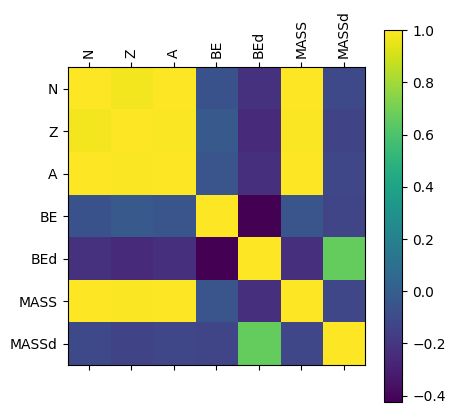

In [13]:
# Create the heatmap
plt.matshow(corr_scores)
# Add the colorbar, which acts as the legend
plt.colorbar()
# Get the number of labels for the correlation matrix and use those labels
# to set custom x and y ticks
n = len(corr_scores.index)
plt.xticks(ticks=range(n), labels=corr_scores.index,rotation=90)
plt.yticks(ticks=range(n), labels=corr_scores.index)

Now that we have determined the columns which are most correlated with the mass, let's make your design or feature matrix. Here I chose to use the number of protons and the number of neutrons, but not the number of nucleons (as that information is stored in the number of protons and the number of neutrons).

In [14]:
# Extract the data needed for the X and y parts of the data set and perform the
# train test split
X = np.array([Z, N]).T
y = np.array(nuclear_data["MASS"])
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

Now we can do the machine learning. Here we will switch to a different machine learning method called [support vector machines](https://en.wikipedia.org/wiki/Support_vector_machine), which are implemented in scikit-learn for regression problems as [SVR](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). Support vector machines have an advantage over ridge regression in two ways. First, they tend to perform better in higher dimensions (in problems which have many features). Second, because support vector machines are based on a [kernel function](https://en.wikipedia.org/wiki/Kernel_method) they are more versitale and can fit a larger variety of data sets.

In [15]:
# Define the support vector machine algorithm for regression
svr = SVR()
# Train, predict, and analyze the results
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
err = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", err, "au")
print("Average Mass:", np.average(y), "au")

Root Mean Squared Error: 4.4861631107079605 au
Average Mass: 132.02827810572512 au


Unlike ridge regression, support vector machines have many more hyperparameters. You can see a full list in the [documentation for the SVR algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html). Note that some hyperparameters only apply for some kernels. Arguably the most important hyperparameter for support vector machines is the kernel. [This example from Scikit-Learn](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html#sphx-glr-auto-examples-svm-plot-svm-regression-py) shows how changing the kernel can give different output shapes for the same data. Below we use a for loop to loop through the four built-in kernel functions. Note that you are also able to provide custom kernel functions in the scikit-learn implementation.

In [16]:
# Iterate through all possible kernel functions, define SVR with the given kernel
# train the algorithm, make predictions, calculate the rmse score, display results
for kernel in ['poly', 'linear', 'rbf', 'sigmoid']:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    err = np.sqrt(mean_squared_error(y_test, y_pred))
    print("Kernel:", kernel)
    print("Mean Squared Error:", err, "au")
    print()

Kernel: poly
Mean Squared Error: 25.048369155070258 au

Kernel: linear
Mean Squared Error: 0.05599494284682653 au

Kernel: rbf
Mean Squared Error: 4.4861631107079605 au

Kernel: sigmoid
Mean Squared Error: 162.24599340227968 au



Another hyperparameter that is present in support vector machines is _C_, which is the strength of the regularization. It plays a similar role to $\alpha$ in ridge regression where changing its value changes the amount the loss function is regularized. Note that C is inversely proportional to the amount of the regulization. See [this example](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_scale_c.html#sphx-glr-auto-examples-svm-plot-svm-scale-c-py) from scikit-learn, though it does deal with classification and not regression.

If we wanted to find the most optimal combinational of kernel function and C value then we could use a nested for loop like below. The first loop iterates over 4 different kernel functions and the second loop iterates over 15 different values for C. For each possible combination of C and kernel function, we define a support vector machine, train it on the training data, use the trained model to make predictions, and then compare the predictions ot the known results. In the below loop the result is printed each time, along with the values of the hyperparameters that were used to get the result. Note that you can adjust the below for loop to use the if statement from the ridge regression hyperparameter tuning so that only the best result is printed in the end.

In [17]:
for kernel in ['poly', 'linear', 'rbf', 'sigmoid']:
    for C in np.linspace(0.01, 5.0, 15):
        svr = SVR(kernel=kernel, C=C)
        svr.fit(X_train, y_train)
        y_pred = svr.predict(X_test)
        err = np.sqrt(mean_squared_error(y_test, y_pred))
        print("Kernel:", kernel)
        print("C:", C)
        print("Mean Squared Error:", err, "au")
        print()

Kernel: poly
C: 0.01
Mean Squared Error: 26.55837805052117 au

Kernel: poly
C: 0.36642857142857144
Mean Squared Error: 25.123804089179462 au

Kernel: poly
C: 0.7228571428571429
Mean Squared Error: 25.07112547777995 au

Kernel: poly
C: 1.0792857142857144
Mean Squared Error: 25.03600017253378 au

Kernel: poly
C: 1.4357142857142857
Mean Squared Error: 25.021388723975093 au

Kernel: poly
C: 1.792142857142857
Mean Squared Error: 24.99430444118489 au

Kernel: poly
C: 2.1485714285714286
Mean Squared Error: 24.981935914267392 au

Kernel: poly
C: 2.505
Mean Squared Error: 24.977810845063413 au

Kernel: poly
C: 2.861428571428571
Mean Squared Error: 24.975478890961963 au

Kernel: poly
C: 3.2178571428571425
Mean Squared Error: 24.971901905362827 au

Kernel: poly
C: 3.574285714285714
Mean Squared Error: 24.94835910851202 au

Kernel: poly
C: 3.9307142857142856
Mean Squared Error: 24.937619978750877 au

Kernel: poly
C: 4.287142857142857
Mean Squared Error: 24.937354289563487 au

Kernel: poly
C: 4.643

In the above example we loop through only two hyperparameters. To be more thorough, there should be many more hyperparameters tested. For example, _degree_ changes the degree of the polynomial kernel and _coef0_ changes the ouput of the polynomial and sigmoid kernels. Machine learning models which are more complicated that support vector machines can have a dozen or more hyperparameters that need to be tuned, making the for loop tuning, though simple for a few hyperparameters, clunky and slow. Luckily, scikit-learn provides several tools to aid in hyperparameter tuning. First, we will example [`'GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), which performs a brute force hyperparameter tuning using [cross-validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

`GridSearchCV` takes three main arguments. A dictionary of possible parameter values, a machine learning algorithm, and a scoring metric. Here we use `neg_mean_squared_error` but other can be found in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html). The `GridSearchCV` algorithm then performs an exhaustive search of all possible combinations of hyperparameters and returns the set that minimizes (or maximizes in some cases) the scoring metric.

Below we attempt to perform hyperparameter tuning on our support vector machine using the `GridSearchCV` tool. Once the hyperparameter tuning is complete we can use the best hyperparameters to train our support vector machine to make predictions.

In [18]:
# Define the parameters for the grid search
parameters = {'kernel':['poly', 'linear', 'rbf', 'sigmoid'],
             'C': np.linspace(0.01, 5.0, 10)}

# Define the support vector machine
svr = SVR()
# Perform the grid search, first by defining the GridSearchCV algorithm and then 
# by fitting the algorithm to the training data
grid_search = GridSearchCV(svr, parameters,\
                           scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best set of hyperparameters and the best score
print(grid_search.best_params_, grid_search.best_score_)

# Train a new support vector machine with the best parameters, train, make predictions,
# and analysis the predictions
svr = SVR(kernel=grid_search.best_params_["kernel"],C=grid_search.best_params_["C"])
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
err = np.sqrt(mean_squared_error(y_test, y_pred))
print("Kernel:", kernel)
print("C:", C)
print("Mean Squared Error:", err, "au")
print()

{'C': 0.01, 'kernel': 'linear'} -0.002620126759927809
Kernel: sigmoid
C: 5.0
Mean Squared Error: 0.052515219059821684 au



In the above case, an exhaustive search of the provided hyperparameters is not too time intensive. However, as the number of hyperparameters and/or the number of tested values per hyperparameter grows, an exhaustive search can be extremely time consuming, especially for longer running machine learning models. ['RandomizedSearchCV'](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) provides an alternative. It's behavior and inputs are similar to that of `GridSearchCV` but instead of performing an exhaustive search it only searches over a given number of randomly selected combinations of parameters. Thus `RandomizedSearchCV` is not as thorough as `GridSearchCV` but can run in more reasonable times. Below is the same hyperparameter tuning set-up as the `GridSearchCV` example above, but adapted for `RandomizedSearchCV`.

In [19]:
# Define the dictionary of parameters, the machine learning algorithms, the RandomizedSearchCV
# algorithm and fit it to the training data. Note that when defining the RandomizedSearchCV
# algorithm there is an extra argument compared to GridSearchCV. n_iter determines how many 
# randomly selected hyperparameter combinations are chosen.
parameters = {'kernel':['poly', 'linear', 'rbf', 'sigmoid'],
             'C': np.linspace(0.01, 5.0, 50)}
svr = SVR()
random_search = RandomizedSearchCV(svr, parameters,\
                                scoring='neg_mean_squared_error', n_iter=50)
random_search.fit(X_train, y_train)

# Display the hyperparameters that lead to the best score and the best score
print(random_search.best_params_, random_search.best_score_)

# Train a new support vector machine with the best parameters, train, make predictions,
# and analysis the predictions
svr = SVR(kernel=random_search.best_params_["kernel"],C=random_search.best_params_["C"])
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
err = np.sqrt(mean_squared_error(y_test, y_pred))
print("Kernel:", kernel)
print("C:", C)
print("Mean Squared Error:", err, "au")
print()

{'kernel': 'linear', 'C': 1.5375510204081633} -0.003009894803144589
Kernel: sigmoid
C: 5.0
Mean Squared Error: 0.05599494284682653 au



Finally, we should discuss feature scaling or feature normalization as both a method of improving the performance of a machine learning algorithm and as a common practice in machine learning. Scaling the data, or normalizing the data so that all values fall in the same range, makes sure that all features are on the same scale prevents bias towards one feature who has larget values than the others. There are several ways to scale the data but a common method is to use the Scikit-Learn [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) which scales the data by both its mean and its standard deviation (scaling equations are provided in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)). Note that we only scale the features of the machine learning algorithm, not the outputs.

The below example combines the `StandardScaler` function for feature scaling along with a `RandomizedSearchCV` for hyperparameter tuning. 

In [20]:
# Define the StandardScalar, fit it to the features, and then scale the features, 
# creating the new feature matrix Z
scaler = StandardScaler()
scaler.fit(X)
Z = scaler.transform(X)

# Perform a new train-test split with Z as the input
Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.20)

# RandomizedSearchCV to find the best parameters
parameters = {'kernel':['poly', 'linear', 'rbf', 'sigmoid'],
             'C': np.linspace(0.01, 5.0, 50)}
svr = SVR()
random_search = RandomizedSearchCV(svr, parameters,\
                                   scoring='neg_mean_squared_error', n_iter=50)
random_search.fit(Z_train, y_train)

# Train a new support vector machine with the best parameters, train, make predictions,
# and analysis the predictions
svr = SVR(kernel=random_search.best_params_["kernel"],C=random_search.best_params_["C"])
svr.fit(Z_train, y_train)
y_pred = svr.predict(Z_test)
err = np.sqrt(mean_squared_error(y_test, y_pred))
print("Kernel:", kernel)
print("C:", C)
print("Mean Squared Error:", err, "au")
print()

Kernel: sigmoid
C: 5.0
Mean Squared Error: 0.06204247296022528 au



## Introduction to Classification

Beside regression, another common machine learning task is classification, where the outputs of the machine learning model can only be one of a small number of values. This is opposed to regression, where the output could be any real number. We have a column in our data set that is clearly categorical: the element name. However, instead of attempting to build a classifier for every single element, let's create a smaller dataframe with the information of only four important metals.

In [21]:
# This dataframe contains only isotopes of iron
iron = nuclear_data[nuclear_data["EL"]=="Fe"]
# This dataframe contains only isotopes of lead
lead = nuclear_data[nuclear_data["EL"]=="Pb"]
# This dataframe contains only isotopes of gold
gold = nuclear_data[nuclear_data["EL"]=="Au"]
# This datframe contains only isotopes of silver
silver = nuclear_data[nuclear_data["EL"]=="Ag"]

# Combine the single metal dataframes into one dataframe
important_metals = pd.concat([iron, lead, gold, silver])

# Display the dataframe
important_metals

,N,Z,A,EL,BE,BEd,MASS,MASSd
413,23,26,49,Fe,8.161311,0.000494,48.973429,0.000026
425,24,26,50,Fe,8.354026,0.000168,49.962988,0.000009
437,25,26,51,Fe,8.460759,0.000176,50.956841,0.000010
448,26,26,52,Fe,8.609574,0.000098,51.948115,0.000005
460,27,26,53,Fe,8.648799,0.000031,52.945306,0.000002
...,...,...,...,...,...,...,...,...
1414,74,47,121,Ag,8.382330,0.000100,120.920125,0.000013
1430,75,47,122,Ag,8.352758,0.000313,121.923664,0.000041
1446,76,47,123,Ag,8.337803,0.000250,122.925337,0.000033
1462,77,47,124,Ag,8.308655,0.002028,123.928931,0.000270


Now we have a small dataset we can use for classification. However, note that the element names are _strings_ of characters. Any column of data that is given to a machine learning algorithm needs to be numerical. Therefore, before we continue we need to encode the information in the EL column of the dataframe as numerical data. There are several ways to accomplish this but one of them is through the [_Categorical_ function](https://pandas.pydata.org/docs/reference/api/pandas.Categorical.html) from Pandas.

In [22]:
important_metals["EL"] = pd.Categorical(important_metals["EL"])
important_metals["EL_codes"] = important_metals["EL"].cat.codes
important_metals["EL_codes"]

413     2
425     2
437     2
448     2
460     2
       ..
1414    0
1430    0
1446    0
1462    0
1478    0
Name: EL_codes, Length: 120, dtype: int8

Now that all of the relevant data is numeric, we can start performing the train-test split. Here we will use the columns of binding energy and mass as the features and the element codes as the _targets_ or the outputs of the classification model. Below we create the train-test split in a similar manner to the rest of the notebook.

In [23]:
BE = np.array(important_metals["BE"])
mass = np.array(important_metals["MASS"])
el_codes = np.array(important_metals["EL_codes"])

X = np.array([BE, mass]).T

X_train, X_test, y_train, y_test = train_test_split(X, el_codes, test_size=0.20)


There are many simple classification algorithms, but one of the most popular ones is [k-nearest neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm). The algorithm is "trained" by creating a map in feature space, or the space there each feature is its own axis. As we have only two features, we can visualize this feature space below using the seaborn pairplot feature. Each point in feature space is then labeled with its classification. When the algorithm needs to make a prediction, it places the new point in feature space and compares it to its k closest neighbors (determined by the Euclidean distance algorithm). It determines the classification to make for the prediction by determining which class of points from the training data the new point lies closest to.

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


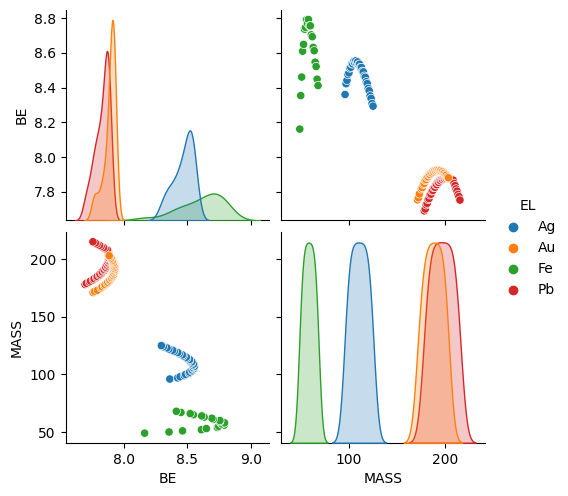

In [24]:
sns.pairplot(important_metals[["BE","EL", "MASS"]], hue="EL")

To implement a [k-nearest neighbors (knn) algorithm in scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), we can use the below code where we set the number of neighbors equal to three in the definition of the algorithm. This means to make predictions the algorithm will look at the three points which lie closest to the point to be predicted.

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

Wheras for regression we have been using the mean-squared error or the root mean-squared error to determine the performance of the machine learning algorithm, for classification problems it would make sense to use another metric. For classification, since we are concerned with how many predictions were made correctly, a common metric to use is the accuracy score. The accuracy score is simply the number of predictions the algorithm made correctly divided by the total number of predictions that were attempted. A score of 0.0 means that 0% of the predictions are correct and a score of 1.0 means that 100% of the predictions were correct. Just like with the mean-squared error score we can use the implementation of the [accuracy score provided by scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

In [26]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
# Print the accuracy score multiplied by 100, to convert to 
# a percentage
print("Accuracy:", accuracy*100)

Accuracy: 70.83333333333334


The accuracy score gives us a one number summary of the performance of the classification algorithm, but does not provide details as to which classifications were correct and which were incorrect. A simple way to visualize this information is with a [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix). The true labels (or the actual element of the metal) are displayed vertically and the predicted labels (the results of the knn algorithm) are displayed horizontally. Correct predictions result in numbers along the main diagonal of the confusion matrix (the true and predicted classes are the same). Incorrect predictions result in numbers off the main diagonal (the true and predicted classes are not the same). 

Not only does the confusion matrix help us determine the number of correct and incorrect predictions, it also helps us determine how items were misclassified and gives us hints as to how to improve the classification.

In the below confusion matrix, created with [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html), all true silver isotopes were predicted as silver isotopes and all true iron isotopes were predicted as iron isotopes. This should not be suprising as both silver and iron have distinct clusters in the pairplot shown above, making them easy targets for classification. However, the confusion matrix also shows some errors in the classification of lead and gold isotopes, where some lead isotopes were classified as gold and some gold isotopes were classified as lead. This should also not be suprising from the confusion matrix above as the gold and lead cluster are close together and overlap at times, making distinguishing these two elements more difficult.

([<matplotlib.axis.YTick at 0x1567054f0>,
 [Text(0, 0, 'Ag'), Text(0, 1, 'Au'), Text(0, 2, 'Fe'), Text(0, 3, 'Pb')])

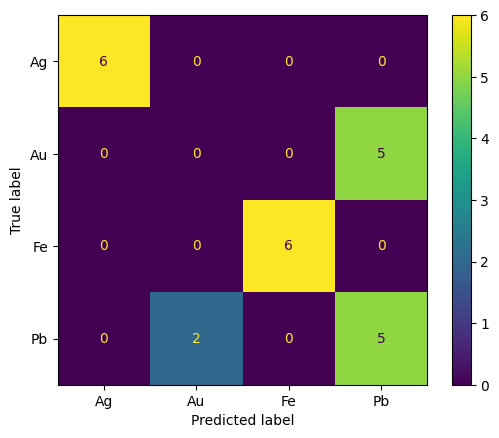

In [27]:
# This function creates the confusion matrix from a trained classifier and the 
# test data set
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
# Get the number of unique entries in the element column of the datframe
# (i.e. the number of classes)
n = important_metals["EL"].nunique()
# Customize the x and y ticks with the element names
plt.xticks(ticks=range(n), labels=important_metals["EL"].cat.categories)
plt.yticks(ticks=range(n), labels=important_metals["EL"].cat.categories)

Just like with regression, we have several methods of improving the accuracy of a classification algorithm. We can start with hyperparameter tuning over the number of neighbors. In the below code cell we use the `RandomizedSearchCV` function to find the number of neighbors which results in the highest accuracy. Note that the major change from this implementation to those above is that the scoring metric in the `RandomizedSearchCV` function has been changed from `neg_mean_squared_error` to `accuracy`. We are no longer performing hyperparameter tuning in hopes of minimizing the mean-squared error, we are attempting to maximize the accuracy.

In [28]:
parameters = {"n_neighbors": np.arange(1,50)}

knn = KNeighborsClassifier()

random_search = RandomizedSearchCV(knn, parameters,\
                                   scoring='accuracy', n_iter=50)
random_search.fit(X_train, y_train)

print(random_search.best_params_, random_search.best_score_)

/Users/juliehartley/Library/Python/3.9/lib/python/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 49 is smaller than n_iter=50. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_neighbors': 18} 0.7821052631578947


Using the results of the above hyperparameter tuning, we can create a new knn algorithm which will hopefully have better performance than the first iteration.

Accuracy: 87.5


([<matplotlib.axis.YTick at 0x16a054ee0>,
 [Text(0, 0, 'Ag'), Text(0, 1, 'Au'), Text(0, 2, 'Fe'), Text(0, 3, 'Pb')])

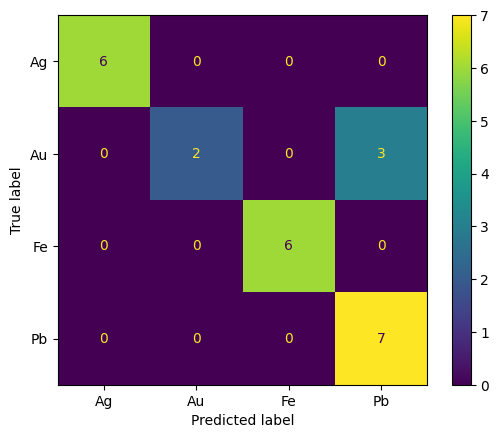

In [29]:
# Train and make predictions with the knn algorithm using the best number of 
# neighbors found using the hyperparameter tuning
knn = KNeighborsClassifier(n_neighbors=random_search.best_params_["n_neighbors"])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Compute an accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Display the confusion matrix
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
n = important_metals["EL"].nunique()
plt.xticks(ticks=range(n), labels=important_metals["EL"].cat.categories)
plt.yticks(ticks=range(n), labels=important_metals["EL"].cat.categories)

We can also attempt to improve the accuracy of a classification algorithm via feature engineering. First, let's try feature selection. The number of protons, Z, would be an easy feature to give the algorithm to ensure 100% accuracy, but let's not do that. Instead, in addition to the features of binding energy and mass, let's also add the number of neutrons, N.

In [30]:
# Extract the relevant features and targets
BE = important_metals["BE"]
mass = important_metals["MASS"]
el_codes = important_metals["EL_codes"]
N = important_metals["N"]

# Generate the features matrix
X = np.array([BE, mass, N]).T

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, el_codes, test_size=0.20)

# Perform hyperparameter tuning with RandomziedSearchCV
parameters = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, parameters,\
                                   scoring='accuracy', n_iter=25)
random_search.fit(X_train, y_train)

print("Best Number of Neighbors:", random_search.best_params_["n_neighbors"])

# Train and make predictions with the knn algorithm using the best number of 
# neighbors found using the hyperparameter tuning
knn = KNeighborsClassifier(n_neighbors=random_search.best_params_["n_neighbors"])
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Compute an accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Best Number of Neighbors: 1
Accuracy: 91.66666666666666


In addition to feature selection, we can also apply feature scaling using the standard scaler to see if that will create a more accurate algorithm.

In [31]:
# Extract the features and generate the feature matrix
BE = important_metals["BE"]
mass = important_metals["MASS"]
el_codes = important_metals["EL_codes"]
X = np.array([BE, mass]).T

# Apply the standard scaler to the X data
scaler = StandardScaler()
scaler.fit(X)
Z = scaler.transform(X)

# Perform the train-test split with the scaled data.
Z_train, Z_test, y_train, y_test = train_test_split(Z, el_codes, test_size=0.20)


# Perform hyperparameter tuning with RandomziedSearchCV
parameters = {"n_neighbors": np.arange(1,50)}
knn = KNeighborsClassifier()
random_search = RandomizedSearchCV(knn, parameters,\
                                   scoring='accuracy', n_iter=25)
random_search.fit(Z_train, y_train)

print("Best Number of Neighbors:", random_search.best_params_["n_neighbors"])

# Train and make predictions with the knn algorithm using the best number of 
# neighbors found using the hyperparameter tuning
knn = KNeighborsClassifier(n_neighbors=random_search.best_params_["n_neighbors"])
knn.fit(Z_train, y_train)
y_pred = knn.predict(Z_test)

# Compute an accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Best Number of Neighbors: 3
Accuracy: 100.0


## Further Investigation

* [Scikit-Learn Documentation Page](https://scikit-learn.org/stable/)
* [Hands-On Machine Learning with Scikit-learn and Tensorflow (book)](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

### Other Simple Regression Algorithms
* [LASSO Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
* [Bayesian Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html)
* [Kernel Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)
* [Gaussian Processes](https://scikit-learn.org/stable/modules/gaussian_process.html)

### Other Simple Classification Algorithms
* [Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
* [Ridge Classification](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html)
* [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

